<div style="background-color:#F5F5BC; color:#FF7F50; font-size:25px; padding:15px; text-align:center; border-radius:15px;">Water Potability
</div>


In [2]:
# importing Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<div style="background-color:#F5F5BC; color:#FF7F50; font-size:25px; padding:15px; text-align:center; border-radius:15px;">DATA Loading
</div>


In [3]:
# Data Loading
train_df = pd.read_csv(r"C:\Users\Parthiban\Desktop\Fractal\train.csv")
test_df = pd.read_csv(r"C:\Users\Parthiban\Desktop\Fractal\test.csv")
train_df.head()

,Index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0,<p>😅The pH value observed is: 0.2644088544860...,<br>😒With a hardness level of 2.6735383052025...,<br>😅The water sample exhibits a total solids ...,1.431972,1.303685,1.563001,0.697062,2.010126,<h1>😀Observing a turbidity value of 1.60887258...,1.252351
1,1,<p>😇The solution's pH level is 0.012034498894...,<h1>😀The water hardness is measured at 2.6303...,<br>😒The total solids content in the sample is...,0.911372,1.181754,1.741640,0.896108,1.807786,<br>😁The water sample exhibits a turbidity rea...,1.124565
2,2,<br>😀The pH reading measures 0.491167423175516...,<h2>😅With a hardness level of 1.2213782428674...,<h1>😍The water sample exhibits a total solids ...,1.506492,1.700871,2.322337,1.035440,1.548768,<p>😇Observing a turbidity value of 1.008907465...,0.525886
3,3,<h1>😅The water sample's pH level is 0.4865531...,<h2>😀With a hardness level of 1.2591335755542...,<h1>😅The total solids content in the sample is...,2.658852,3.035266,2.409255,1.185713,1.232375,<p>😇The water sample exhibits a turbidity read...,0.715288
4,4,<p>😍The observed pH value of 0.07548804288855...,<p>😁With a hardness level of 1.65681755735377...,<p>😍The total solids content in the sample is ...,2.169616,1.520531,1.990604,1.237182,1.589307,<h1>😒The water sample exhibits a turbidity rea...,0.890722


In [4]:
# Shape of Data
print(f"shape of the Train Data : {train_df.shape}")
print(f"shape of the Test Data : {test_df.shape}")

shape of the Train Data : (10000, 11)
shape of the Test Data : (5000, 10)


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            10000 non-null  int64  
 1   ph               10000 non-null  object 
 2   Hardness         10000 non-null  object 
 3   Solids           10000 non-null  object 
 4   Chloramines      10000 non-null  float64
 5   Sulfate          10000 non-null  float64
 6   Conductivity     10000 non-null  float64
 7   Organic_carbon   10000 non-null  float64
 8   Trihalomethanes  10000 non-null  float64
 9   Turbidity        10000 non-null  object 
 10  Potability       10000 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 859.5+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            5000 non-null   int64  
 1   ph               5000 non-null   object 
 2   Hardness         5000 non-null   object 
 3   Solids           5000 non-null   object 
 4   Chloramines      5000 non-null   float64
 5   Sulfate          5000 non-null   float64
 6   Conductivity     5000 non-null   float64
 7   Organic_carbon   5000 non-null   float64
 8   Trihalomethanes  5000 non-null   float64
 9   Turbidity        5000 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 390.8+ KB


In [7]:
print("No of Null Values in Train Data")
print(train_df.isnull().sum())
print("\n")

print("No of Null Values in Test Data")
print(test_df.isnull().sum())


No of Null Values in Train Data
Index              0
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


No of Null Values in Test Data
Index              0
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64


In [8]:
print(f"Duplicates in Test Data : {train_df.duplicated().sum()}")
print(f"Duplicates in Test Data : {test_df.duplicated().sum()}")

Duplicates in Test Data : 0
Duplicates in Test Data : 0


<div style="background-color:#F5F5BC; color:#FF7F50; font-size:25px; padding:15px; text-align:center; border-radius:15px;">Data Cleaning
</div>


In [9]:
# Data Cleaning
def data_cleaning(col,df):
    # Removing HTML Tags to handle numeric values in h1 , h2 tags
    df[col] = df[col].str.replace('<h1>','')
    df[col] = df[col].str.replace('</h1>','')
    df[col] = df[col].str.replace('<h2>','')
    df[col] = df[col].str.replace('</h2>','')

    df[col] = df[col].str.findall(r"[\d.]+") # extracting numeric values in the text
     # selecting the first column values as the desired result where second column contains only .{dot}
    df[col] = df[col].apply(lambda x: float(x[0]))

    print(f"Null values in {col} Level : {df[col].isnull().sum()}")

In [10]:
print("Data Cleaning in Train Data : ")
data_cleaning('ph',train_df)
data_cleaning('Hardness',train_df)
data_cleaning('Solids',train_df)
data_cleaning('Turbidity',train_df)

print("\n")


print("Data Cleaning in Train Data :")
data_cleaning('ph',test_df)
data_cleaning('Hardness',test_df)
data_cleaning('Solids',test_df)
data_cleaning('Turbidity',test_df)


Data Cleaning in Train Data : 
Null values in ph Level : 0
Null values in Hardness Level : 0
Null values in Solids Level : 0
Null values in Turbidity Level : 0


Data Cleaning in Train Data :
Null values in ph Level : 0
Null values in Hardness Level : 0
Null values in Solids Level : 0
Null values in Turbidity Level : 0


In [11]:
#pd.set_option("display.max_colwidth", None) 

In [12]:
# No of Unique Values in Data
for col in train_df.columns:
    print(f"{col} : {train_df[col].nunique()}")

Index : 10000
ph : 10000
Hardness : 10000
Solids : 10000
Chloramines : 10000
Sulfate : 10000
Conductivity : 10000
Organic_carbon : 10000
Trihalomethanes : 10000
Turbidity : 10000
Potability : 10000


In [13]:
numeric_columns = train_df.select_dtypes(include='float64').columns
numeric_columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

<div style="background-color:#F5F5BC; color:#FF7F50; font-size:25px; padding:15px; text-align:center; border-radius:15px;">Data Analysis</div>


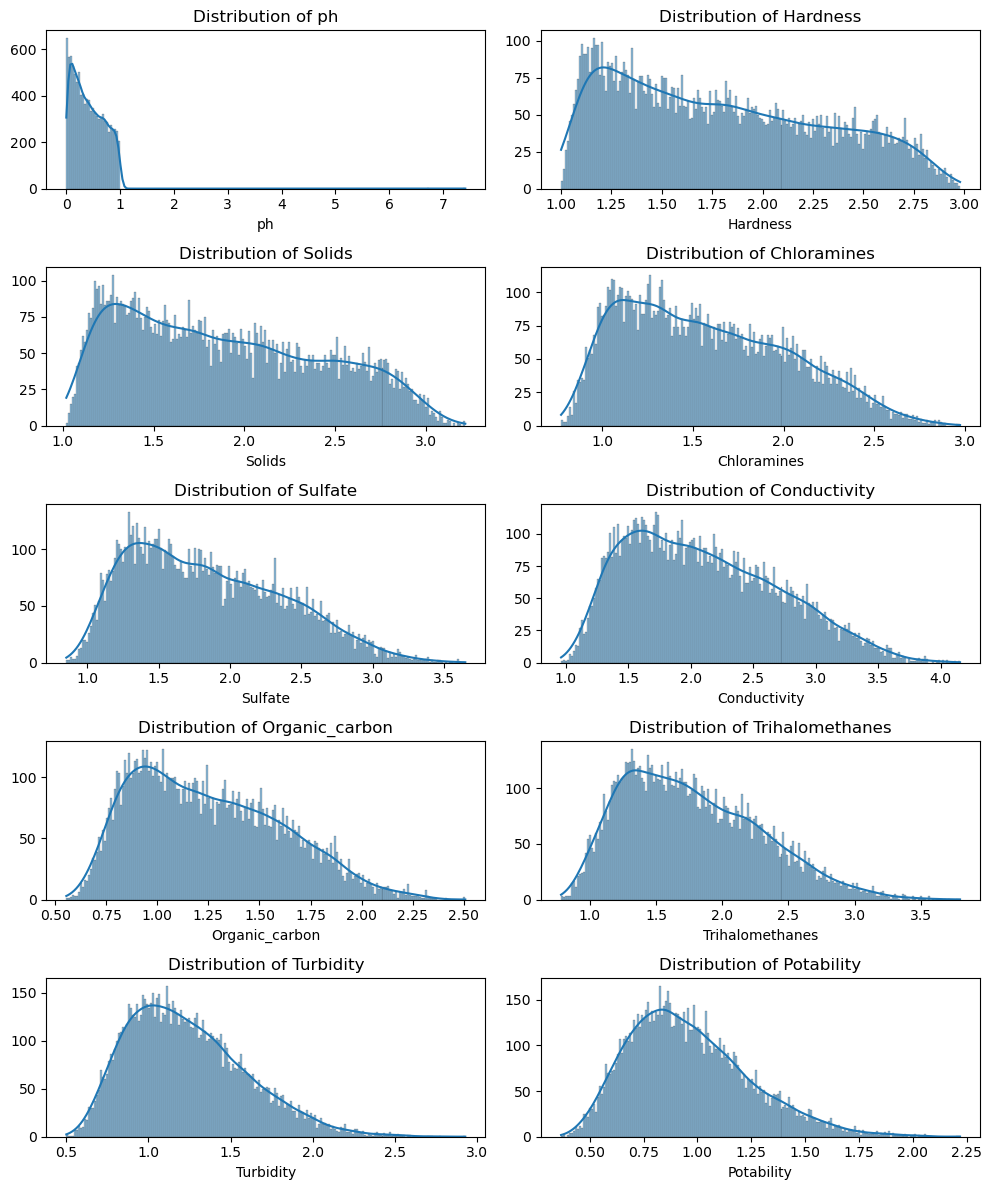

In [14]:
i = 0  # Initialize counter for subplot numbering

# Set up the figure
plt.figure(figsize=(10, 12))

def hist_plot(col):
    global i
    i += 1
    plt.subplot(5, 2, i)  # Create a subplot in a 5x2 grid
    sns.histplot(x=train_df[col], kde=True, bins=200)  # Plot histogram with KDE
    plt.xlabel(col)
    plt.ylabel("")
    plt.title(f"Distribution of {col}")

for col in numeric_columns:
    hist_plot(col)

plt.tight_layout()

plt.show()

pH: The distribution of pH is heavily skewed towards lower values, with most data points concentrated around 0. The tail extends slightly towards higher values, indicating a potentially significant number of samples with higher pH.

Hardness: The hardness of water is somewhat evenly distributed, with the majority of samples having a hardness around 1.5, with a slight peak near the lower values. It seems to have a long tail on the higher side, indicating that there are fewer samples with very high hardness levels.

Solids: The distribution of solids shows a peak around 1.5, with a long tail towards higher values. The data suggests that the majority of samples have a relatively low concentration of solids, but a few have much higher concentrations.

Chloramines: This distribution is skewed to the right, with a concentration of values around the lower end and a sharp decline as the values increase. It suggests that most water samples have low levels of chloramines.

Sulfate: The sulfate distribution is bell-shaped, showing a moderate concentration around the middle range. It appears to be normally distributed, suggesting relatively uniform sulfate levels in the samples.

Conductivity: Conductivity values have a broad distribution with a slight peak in the lower to mid-range. The majority of samples show moderate conductivity, with fewer samples showing very high or low conductivity.

Organic Carbon: Organic carbon concentrations appear to have a moderate distribution, with a peak near the lower values (around 1). There are fewer samples with higher concentrations, indicating lower levels of organic carbon in the water.

Trihalomethanes: The distribution for trihalomethanes shows a slight peak near 1, indicating that most samples have moderate levels of trihalomethanes. There's a slight right-skew, suggesting that there are a few extreme values on the higher end.

Turbidity: The turbidity distribution is skewed slightly towards the lower values, with the highest concentration in the middle range. The data indicates that most samples have low to moderate turbidity levels.

Potability: The distribution of potability suggests that the majority of samples are more likely to be potable (around 0.5 to 1), with very few cases showing extreme values, either for poor or very good potability.

In [15]:
# selecting Columns for  Training
train_dff  = train_df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']]

train_dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               10000 non-null  float64
 1   Hardness         10000 non-null  float64
 2   Solids           10000 non-null  float64
 3   Chloramines      10000 non-null  float64
 4   Sulfate          10000 non-null  float64
 5   Conductivity     10000 non-null  float64
 6   Organic_carbon   10000 non-null  float64
 7   Trihalomethanes  10000 non-null  float64
 8   Turbidity        10000 non-null  float64
 9   Potability       10000 non-null  float64
dtypes: float64(10)
memory usage: 781.4 KB


Text(0.5, 1.0, 'Correlation between Features')

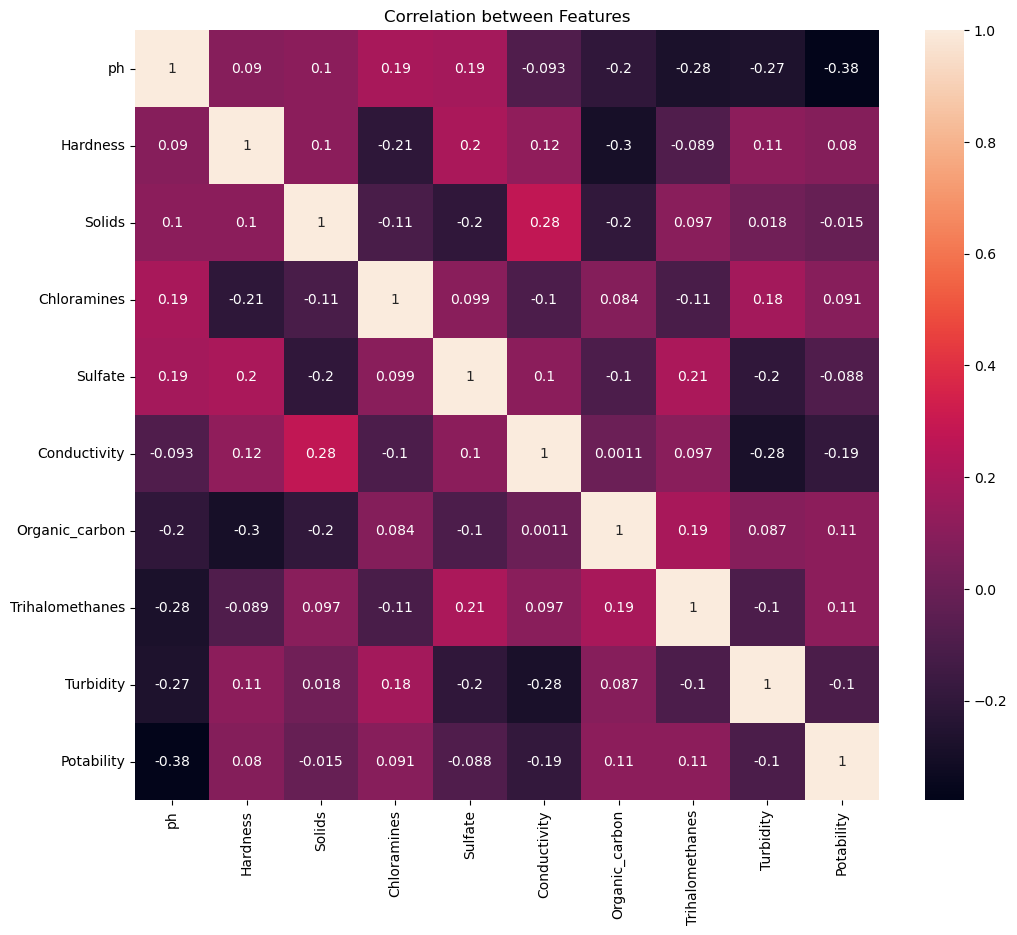

In [16]:
corr = train_dff.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot =True)
plt.title("Correlation between Features")

In [17]:
from sklearn.model_selection import train_test_split
# splitting the Data
X = train_dff.drop(columns='Potability')
y = train_dff['Potability']

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state =42,test_size=0.2)

<div style="background-color:#F5F5BC; color:#FF7F50; font-size:25px; padding:15px; text-align:center; border-radius:15px;">Evaluation Metrics
</div>


In [30]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , root_mean_squared_error , r2_score ,median_absolute_error
# Evaluation Metrics
def eval_metric(y_true,y_pred,model):
    print(model)
    print(f"Mean Absolute Error : {mean_absolute_error(y_true,y_pred)}")
    print(f"Mean Squared Error : {mean_squared_error(y_true,y_pred)}")
    print(f"Root Mean Squared  Error : {root_mean_squared_error(y_true,y_pred)}")
    print(f"R2 Score : {r2_score(y_true,y_pred)}")
    mae = median_absolute_error(y_true, y_pred)

    # Calculate the custom score
    score = max(0, 100 * (1 - mae))

    print(f"Mean Absolute Error: {mae}")
    print(f"Custom Score: {score}")
   




<div style="background-color:#F5F5BC; color:#FF7F50; font-size:25px; padding:15px; text-align:center; border-radius:15px;">ML Model Building
</div>


In [31]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)


y_pred = lr.predict(X_test)

eval_metric(y_test,y_pred,"Linear Regression ")

Linear Regression 
Mean Absolute Error : 0.16230807044710166
Mean Squared Error : 0.03934512482620094
Root Mean Squared  Error : 0.1983560556832106
R2 Score : 0.5374844825419034
Mean Absolute Error: 0.14950901647991283
Custom Score: 85.04909835200871


In [32]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)
eval_metric(y_test,y_pred,"Decision Tree Regressor")

Decision Tree Regressor
Mean Absolute Error : 0.22659819739354792
Mean Squared Error : 0.08304676953612714
Root Mean Squared  Error : 0.2881783641013446
R2 Score : 0.023756570734104532
Mean Absolute Error: 0.1845357030742818
Custom Score: 81.54642969257182


In [33]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=250,
                           max_depth=10,
                           max_samples = 0.7,
                           random_state =42,
                           min_samples_split=5)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

eval_metric(y_test,rf_pred,"Random Forest Regressor")

Random Forest Regressor
Mean Absolute Error : 0.16556170649719557
Mean Squared Error : 0.04106758144219073
Root Mean Squared  Error : 0.20265137907793948
R2 Score : 0.5172364107270919
Mean Absolute Error: 0.14863017888771257
Custom Score: 85.13698211122875


In [34]:
from xgboost import XGBRegressor


xgb = XGBRegressor(random_state =42,
                   n_estimators =250,
                   max_depth = 20,
                   )

xgb.fit(X_train,y_train)

xgb_pred = xgb.predict(X_test)
eval_metric(y_test,xgb_pred,"XGB Regressor")

XGB Regressor
Mean Absolute Error : 0.17760736474016903
Mean Squared Error : 0.04868778167904243
Root Mean Squared  Error : 0.22065307992194996
R2 Score : 0.4276583277689018
Mean Absolute Error: 0.15291950887484257
Custom Score: 84.70804911251575


In [35]:
test_df.columns

Index(['Index', 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
       'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

<div style="background-color:#F5F5BC; color:#FF7F50; font-size:25px; padding:15px; text-align:center; border-radius:15px;">Submission File
</div>


In [28]:
test_dff = test_df[[ 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
       'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
lr_predictions = lr.predict(test_dff)

predictions = pd.DataFrame({'Index':test_df['Index'],'Potability':lr_predictions})

predictions = predictions.set_index('Index')
# Submission File
predictions.to_csv("Submission.csv")

In [29]:
predictions

,Potability
Index,
10000,1.037202
10001,1.085205
10002,1.059955
10003,0.822387
10004,1.221848
...,...
14995,1.002781
14996,0.615972
14997,1.328001


<div style="background-color:#F5F5BC; color:#FF7F50; font-size:25px; padding:15px; text-align:center; border-radius:15px;">Linear Regreession performs Well</div>
